<a href="https://colab.research.google.com/github/marianamirela/Projeto-An-lise-Num-rica-I/blob/main/Projeto_An%C3%A1lise_Num%C3%A9rica_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando Bibliotecas**




In [41]:
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eigvals, norm

# *Parte 1* : **Métodos iterativos para sistemas lineares. Métodos a implementar:**

• Método de Jacobi.

• Método de Gauss-Seidel.

• Método da Relaxação Sucessiva (SOR).

• Método dos Gradientes Conjugados.



## **1. Testes e análise da convergência:**





**(a)** Gere uma matriz estritamente diagonalmente dominante. Analise a convergência de todos os métodos. Registre o número de iterações e o tempo
de execução.

*   ###  *Método de Jacobi*

In [30]:
def jacobi_matricial(M, y, chute_inicial=None, tolerancia=1e-6, limite_iter=1000):
    M = np.array(M, dtype=float)
    y = np.array(y, dtype=float)

    ordem = len(M)
    aproximacao = np.zeros(ordem) if chute_inicial is None else np.array(chute_inicial, dtype=float)

    diagonal = np.diag(np.diag(M))
    resto = M - diagonal

    operador = -np.linalg.inv(diagonal) @ resto
    termo_indep = np.linalg.inv(diagonal) @ y

    contador = 0
    inicio_tempo = time.time()

    while contador < limite_iter:
        anterior = aproximacao.copy()
        aproximacao = operador @ anterior + termo_indep
        contador += 1

        if np.linalg.norm(aproximacao - anterior, ord=np.inf) < tolerancia:
            break

    tempo_total = time.time() - inicio_tempo

    return aproximacao, contador, tempo_total


*   ###  *Método de Gauss-Seidel*

In [31]:

def seidel_matricial(M, y, chute_inicial=None, tolerancia=1e-6, limite_iter=1000):
    M = np.array(M, dtype=float)
    y = np.array(y, dtype=float)

    ordem = len(M)
    aproximacao = np.zeros(ordem) if chute_inicial is None else np.array(chute_inicial, dtype=float)
    diagonal = np.diag(np.diag(M))
    inferior = np.tril(M, -1)
    superior = np.triu(M, 1)


    operador = -np.linalg.inv(diagonal + inferior) @ superior
    termo_indep = np.linalg.inv(diagonal + inferior) @ y

    contador = 0
    inicio_tempo = time.time()

    while contador < limite_iter:
        anterior = aproximacao.copy()
        aproximacao = operador @ anterior + termo_indep
        contador += 1

        if np.linalg.norm(aproximacao - anterior, ord=np.inf) < tolerancia:
            break

    tempo_total = time.time() - inicio_tempo

    return aproximacao, contador, tempo_total



*   ###  *Método da Relaxação Sucessiva (SOR)*



In [32]:
def sor_matricial(M, y, chute_inicial=None, relaxacao=1.0, tolerancia=1e-6, limite_iter=1000):
    """
    SOR em forma matricial. 'relaxacao' é o ω.
    """
    M = np.array(M, dtype=float)
    y = np.array(y, dtype=float)

    ordem = len(M)
    aproximacao = np.zeros(ordem) if chute_inicial is None else np.array(chute_inicial, dtype=float)


    diagonal = np.diag(np.diag(M))
    inferior = np.tril(M, -1)
    superior = np.triu(M, 1)


    matriz_base = diagonal + relaxacao * inferior
    matriz_aux = ((1 - relaxacao) * diagonal) - (relaxacao * superior)

    operador = np.linalg.inv(matriz_base) @ matriz_aux
    termo_indep = relaxacao * np.linalg.inv(matriz_base) @ y

    contador = 0
    inicio_tempo = time.time()

    while contador < limite_iter:
        anterior = aproximacao.copy()
        aproximacao = operador @ anterior + termo_indep
        contador += 1

        if np.linalg.norm(aproximacao - anterior, ord=np.inf) < tolerancia:
            break

    tempo_total = time.time() - inicio_tempo

    return aproximacao, contador, tempo_total

*   ###  *Método dos Gradientes Conjugados*

In [33]:
 def gradiente_conj_maricial(M, y, chute_inicial=None, tolerancia=1e-8, limite_iter=None):
    M = np.array(M, dtype=float)
    y = np.array(y, dtype=float)

    ordem = len(y)
    aproximacao = np.zeros(ordem) if chute_inicial is None else np.array(chute_inicial, dtype=float)

    if limite_iter is None:
        limite_iter = ordem

    residuo = y - M @ aproximacao
    direcao = residuo.copy()
    produto_ant = residuo @ residuo

    contador = 0
    inicio_tempo = time.time()

    for _ in range(limite_iter):
        Md = M @ direcao
        passo = produto_ant / (direcao @ Md)

        aproximacao = aproximacao + passo * direcao
        residuo = residuo - passo * Md

        produto_novo = residuo @ residuo
        contador += 1


        if np.sqrt(produto_novo) < tolerancia:
            break

        fator = produto_novo / produto_ant
        direcao = residuo + fator * direcao
        produto_ant = produto_novo

    tempo_total = time.time() - inicio_tempo

    return aproximacao, contador, tempo_total


In [34]:
def construir_matriz_simetrica_dd(tam, minimo=-5, maximo=5, margem_diag_min=1.0):
    """
    Gera uma matriz simétrica e estritamente diagonalmente dominante.
    """
    base = np.random.randint(minimo, maximo + 1, size=(tam, tam)).astype(float)
    M = 0.5 * (base + base.T)

    for i in range(tam):
        soma_outros = np.sum(np.abs(M[i])) - np.abs(M[i, i])
        M[i, i] = soma_outros + np.random.uniform(margem_diag_min, margem_diag_min + 5.0)

    return M

In [38]:
np.random.seed(123)

n = 5

M = construir_matriz_simetrica_dd(n)
v = np.random.randint(-10, 10, size=n).astype(float)

x_ini = np.zeros(n)

sol_jacobi, it_jacobi, t_jacobi = jacobi_matricial(M, v, x_ini)
sol_gs, it_gs, t_gs = seidel_matricial(M, v, x_ini)
sol_sor, it_sor, t_sor = sor_matricial(M, v, x_ini, relaxacao=1.2)
sol_cg, it_cg, t_cg = gradiente_conj_maricial(M, v, x_ini)

print("\nMatriz\n", M)
print("\nVetor\n", v)

print("\nResultados\n")

print("Jacobi:")
print("x ≈", np.round(sol_jacobi, 8))
print("Iterações:", it_jacobi)
print("Tempo:", round(t_jacobi, 6), "s\n")

print("Gauss-Seidel:")
print("x ≈", np.round(sol_gs, 8))
print("Iterações:", it_gs)
print("Tempo:", round(t_gs, 6), "s\n")

print("SOR (ω = 1.2):")
print("x ≈", np.round(sol_sor, 8))
print("Iterações:", it_sor)
print("Tempo:", round(t_sor, 6), "s\n")

print("Gradientes Conjugados:")
print("x ≈", np.round(sol_cg, 8))
print("Iterações:", it_cg)
print("Tempo:", round(t_cg, 6), "s\n")

tabela_resumo = pd.DataFrame({
    "Método": ["Jacobi", "Gauss-Seidel", "SOR (ω=1.2)", "Gradientes Conjugados"],
    "Iterações": [it_jacobi, it_gs, it_sor, it_cg],
    "Tempo (s)": [t_jacobi, t_gs, t_sor, t_cg]
})



Matriz
 [[12.15775687  1.         -1.5        -3.         -3.        ]
 [ 1.         11.15913794  2.5        -2.5        -1.5       ]
 [-1.5         2.5        14.17200479 -5.          1.        ]
 [-3.         -2.5        -5.         17.74715897 -2.        ]
 [-3.         -1.5         1.         -2.         12.12227662]]

Vetor
 [-4. -9. -8. -9.  2.]

Resultados

Jacobi:
x ≈ [-0.65489214 -0.80961786 -0.82532649 -0.98602123 -0.19186296]
Iterações: 20
Tempo: 0.000448 s

Gauss-Seidel:
x ≈ [-0.65489274 -0.80961804 -0.82532702 -0.98602177 -0.19186345]
Iterações: 12
Tempo: 0.000189 s

SOR (ω = 1.2):
x ≈ [-0.65489286 -0.80961806 -0.82532712 -0.98602186 -0.19186347]
Iterações: 11
Tempo: 0.000171 s

Gradientes Conjugados:
x ≈ [-0.6548929  -0.80961802 -0.82532713 -0.98602184 -0.19186349]
Iterações: 5
Tempo: 0.000114 s



In [39]:
res_jac = np.linalg.norm(M @ sol_jacobi - v)
res_gs  = np.linalg.norm(M @ sol_gs      - v)
res_sor = np.linalg.norm(M @ sol_sor     - v)
res_cg  = np.linalg.norm(M @ sol_cg      - v)

tabela_final = pd.DataFrame({
    "Método": ["Jacobi", "Gauss-Seidel", "SOR (ω=1.2)", "Gradientes Conjugados"],
    "Iterações": [it_jacobi, it_gs, it_sor, it_cg],
    "Tempo (s)": [t_jacobi, t_gs, t_sor, t_cg],
    "Resíduo final ‖M·x − v‖": [res_jac, res_gs, res_sor, res_cg]
})

tabela_final["Tempo (s)"] = tabela_final["Tempo (s)"].round(6)
tabela_final["Resíduo final ‖M·x − v‖"] = tabela_final["Resíduo final ‖M·x − v‖"].apply(lambda x: f"{x:.3e}")

print("\nResultado Completo\n")
print(tabela_final)


Resultado Completo

                  Método  Iterações  Tempo (s) Resíduo final ‖M·x − v‖
0                 Jacobi         20   0.000448               9.380e-06
1           Gauss-Seidel         12   0.000189               1.732e-06
2            SOR (ω=1.2)         11   0.000171               8.073e-07
3  Gradientes Conjugados          5   0.000114               5.044e-15


In [20]:


def historico_jacobi(M, v, x0, tolerancia=1e-6, limite_iter=1000):
    M = np.array(M, dtype=float)
    v = np.array(v, dtype=float)
    x = np.array(x0, dtype=float)

    D = np.diag(np.diag(M))
    R = M - D

    T = -np.linalg.inv(D) @ R
    c = np.linalg.inv(D) @ v

    hist_res = []

    for k in range(limite_iter):
        res = np.linalg.norm(M @ x - v)
        hist_res.append(res)

        x_novo = T @ x + c

        if np.linalg.norm(x_novo - x, ord=np.inf) < tolerancia:
            x = x_novo
            hist_res.append(np.linalg.norm(M @ x - v))
            break

        x = x_novo

    return np.array(hist_res)


def historico_gs(M, v, x0, tolerancia=1e-6, limite_iter=1000):
    M = np.array(M, dtype=float)
    v = np.array(v, dtype=float)
    x = np.array(x0, dtype=float)

    D = np.diag(np.diag(M))
    L = np.tril(M, -1)
    U = np.triu(M, 1)

    T = -np.linalg.inv(D + L) @ U
    c = np.linalg.inv(D + L) @ v

    hist_res = []

    for k in range(limite_iter):
        res = np.linalg.norm(M @ x - v)
        hist_res.append(res)

        x_novo = T @ x + c

        if np.linalg.norm(x_novo - x, ord=np.inf) < tolerancia:
            x = x_novo
            hist_res.append(np.linalg.norm(M @ x - v))
            break

        x = x_novo

    return np.array(hist_res)


def historico_sor(M, v, x0, omega=1.2, tolerancia=1e-6, limite_iter=1000):
    M = np.array(M, dtype=float)
    v = np.array(v, dtype=float)
    x = np.array(x0, dtype=float)

    D = np.diag(np.diag(M))
    L = np.tril(M, -1)
    U = np.triu(M, 1)

    B = D + omega * L
    C = (1 - omega) * D - omega * U

    T = np.linalg.inv(B) @ C
    c = omega * np.linalg.inv(B) @ v

    hist_res = []

    for k in range(limite_iter):
        res = np.linalg.norm(M @ x - v)
        hist_res.append(res)

        x_novo = T @ x + c

        if np.linalg.norm(x_novo - x, ord=np.inf) < tolerancia:
            x = x_novo
            hist_res.append(np.linalg.norm(M @ x - v))
            break

        x = x_novo

    return np.array(hist_res)


def historico_cg(M, v, x0, tolerancia=1e-8, limite_iter=None):
    M = np.array(M, dtype=float)
    v = np.array(v, dtype=float)
    x = np.array(x0, dtype=float)

    n = len(v)
    if limite_iter is None:
        limite_iter = n

    r = v - M @ x
    d = r.copy()
    rr_old = r @ r

    hist_res = []

    for k in range(limite_iter):
        res = np.linalg.norm(M @ x - v)
        hist_res.append(res)

        Md = M @ d
        alpha = rr_old / (d @ Md)

        x = x + alpha * d
        r = r - alpha * Md

        rr_new = r @ r

        if np.sqrt(rr_new) < tolerancia:
            hist_res.append(np.linalg.norm(M @ x - v))
            break

        beta = rr_new / rr_old
        d = r + beta * d
        rr_old = rr_new

    return np.array(hist_res)


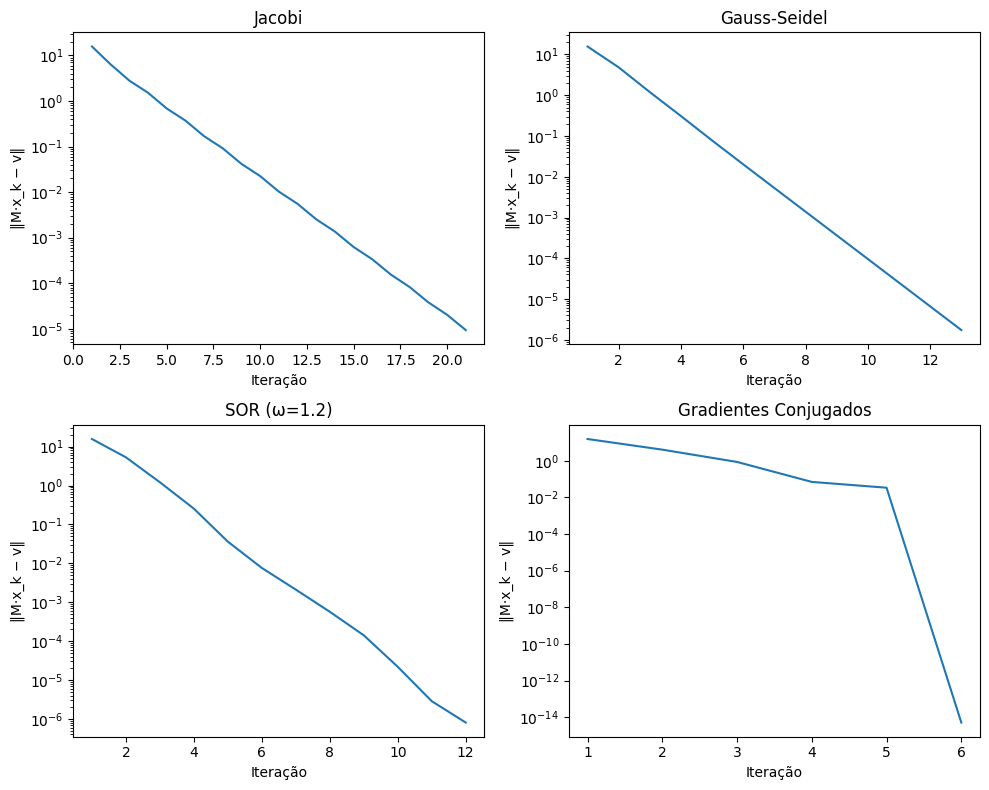

In [20]:
hist_jac = historico_jacobi(M, v, x_ini)
hist_gs  = historico_gs(M, v, x_ini)
hist_sor = historico_sor(M, v, x_ini, omega=1.2)
hist_cg  = historico_cg(M, v, x_ini)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

historicos = [
    ("Jacobi", hist_jac, axs[0, 0]),
    ("Gauss-Seidel", hist_gs, axs[0, 1]),
    ("SOR (ω=1.2)", hist_sor, axs[1, 0]),
    ("Gradientes Conjugados", hist_cg, axs[1, 1]),
]

for titulo, hist, ax in historicos:
    iteracoes = np.arange(1, len(hist) + 1)
    ax.plot(iteracoes, hist)
    ax.set_title(titulo)
    ax.set_xlabel("Iteração")
    ax.set_ylabel("‖M·x_k − v‖")
    ax.set_yscale("log")

plt.tight_layout()
plt.show()


**(b)** Gere uma matriz tal que o método de Jacobi divirja e o método de GaussSeidel convirja. Porque?


In [45]:
np.random.seed(123)

def gerar_matriz_exemplo(tam=3, max_int=5, tentativas=5000):
    """
    Gera uma matriz M tal que:
      - Jacobi diverge (ρ(B_Jacobi) > 1)
      - Gauss-Seidel converge (ρ(B_GS) < 1)
    usando a mesma decomposição M = D + L + U
    que você já usa nos métodos matriciais.
    """
    for _ in range(tentativas):
        M = np.random.randint(-max_int, max_int + 1, (tam, tam)).astype(float)

        for i in range(tam):
            if M[i, i] == 0:
                M[i, i] = random.choice([1, 2, 3, 4, 5])

        D = np.diag(np.diag(M))
        L = np.tril(M, -1)
        U = np.triu(M, 1)

        try:
            BJ  = -np.linalg.inv(D)      @ (L + U)
            BGS = -np.linalg.inv(D + L)  @ U
        except np.linalg.LinAlgError:
            continue

        rho_BJ  = max(abs(np.linalg.eigvals(BJ)))
        rho_BGS = max(abs(np.linalg.eigvals(BGS)))

        if rho_BJ > 1 and rho_BGS < 1:
            return M, rho_BJ, rho_BGS

    return None, None, None


M_b, rho_J, rho_GS = gerar_matriz_exemplo(tam=5)

if M_b is not None:
    print("Matriz gerada")
    print(M_b)
    print(f"\nρ(B_Jacobi)       = {rho_J:.6f}  → Jacobi diverge")
    print(f"ρ(B_Gauss-Seidel) = {rho_GS:.6f}  → Gauss-Seidel converge")
else:
    print("Nenhuma matriz com as propriedades desejadas foi encontrada.")


Matriz gerada
[[-5.  4. -3.  1. -2.]
 [ 2.  4.  4.  1. -5.]
 [ 3. -4.  4. -2.  1.]
 [-1.  0. -4.  3.  0.]
 [ 1. -3. -1.  1.  3.]]

ρ(B_Jacobi)       = 1.374190  → Jacobi diverge
ρ(B_Gauss-Seidel) = 0.589102  → Gauss-Seidel converge


**(c)** Gere uma matriz tal que o método de Gauss-Seidel divirja e o método de
SOR convirja. Porque?



In [96]:
np.random.seed(123)

def raio_espectral(B):
    """Retorna o raio espectral de B."""
    return max(abs(np.linalg.eigvals(B)))


def encontrar_matriz_sor(tam=3, max_tentativas=5000):
    """
    Gera uma matriz M tal que:
      - o método de Gauss-Seidel (matricial) DIVERGE  (ρ(B_GS) > 1)
      - o método SOR (na forma que você usa) CONVERGE (ρ(B_SOR) < 1)
    usando a decomposição M = D + L + U.
    """
    for tent in range(max_tentativas):

        M = np.random.uniform(-5, 5, (tam, tam))

        D = np.diag(np.diag(M))
        L = np.tril(M, -1)
        U = np.triu(M, 1)

        try:
            B_GS = -np.linalg.inv(D + L) @ U
        except np.linalg.LinAlgError:
            continue

        rho_GS = raio_espectral(B_GS)

        if rho_GS <= 1:
            continue

        for relaxacao in np.linspace(0.1, 1.9, 50):

            matriz_base = D + relaxacao * L
            matriz_aux  = (1 - relaxacao) * D - relaxacao * U

            try:
                B_SOR = np.linalg.inv(matriz_base) @ matriz_aux
            except np.linalg.LinAlgError:
                continue

            rho_SOR = raio_espectral(B_SOR)

            if rho_SOR < 1:
                return M, rho_GS, rho_SOR, relaxacao, tent + 1

    return None, None, None, None, None


M_c, rho_GS, rho_SOR, relaxacao_encontrada, tentativas = encontrar_matriz_sor(tam=5)

if M_c is not None:
    print("Matriz M encontrada \n")
    print(M_c)
    print(f"\nρ(B_GS)  = {rho_GS:.6f}  → Gauss-Seidel DIVERGE")
    print(f"ρ(B_SOR) = {rho_SOR:.6f}  → SOR CONVERGE com ω = {relaxacao_encontrada:.3f}")
    print(f"(encontrada na tentativa {tentativas})")
else:
    print("Nenhuma matriz com as propriedades desejadas foi encontrada.")


Matriz M encontrada 

[[ 0.13128154  1.6662455  -3.94091515 -3.69105049 -1.78019394]
 [ 1.61564337  3.46506225  0.53257345  3.54452488 -1.15162189]
 [-1.83212103 -1.45735324 -3.28918171  3.29112635 -1.61329154]
 [ 0.52370075  0.78551468  0.21533059 -4.97311935  4.88345419]
 [ 4.05341576 -2.92364139 -2.07510587  0.20010153  4.01911373]]

ρ(B_GS)  = 24.820668  → Gauss-Seidel DIVERGE
ρ(B_SOR) = 0.924256  → SOR CONVERGE com ω = 0.100
(encontrada na tentativa 5)


**(d)** Gere uma matriz tal que o método de SOR divirja e o método dos Gradiente conjugados convirja. Porque?

In [24]:
np.random.seed(0)

dim = 5

N = np.random.randn(dim, dim)
M = N.T @ N + dim * np.eye(dim)

v = np.random.randn(dim)

x_ini = np.zeros(dim)

relaxacao_ruim = 2.5

x_sor, it_sor, t_sor = sor_matricial(
    M, v, x_ini,
    relaxacao=relaxacao_ruim,
    tolerancia=1e-6,
    limite_iter=200
)

x_cg, it_cg, t_cg = gradiente_conj_maricial(
    M, v, x_ini,
    tolerancia=1e-8
)

print("Matriz do sistema (M):")
print(M)

print("\nResultado do SOR (esperado NÃO convergir):")
print("Iterações:", it_sor)
print("Aproximação x:", x_sor)

print("\nResultado do Gradientes Conjugados (esperado CONVERGIR):")
print("Iterações:", it_cg)
print("Aproximação x:", x_cg)


Matriz do sistema (M):
[[15.71679684 -1.18326917 -0.29126718  6.0706553  -3.1225134 ]
 [-1.18326917 10.83719477  1.61309224  0.95824633  1.99038747]
 [-0.29126718  1.61309224  7.34935532  1.59568675  4.24078242]
 [ 6.0706553   0.95824633  1.59568675 10.69588157  2.24470128]
 [-3.1225134   1.99038747  4.24078242  2.24470128 14.73464413]]

Resultado do SOR (esperado NÃO convergir):
Iterações: 200
Aproximação x: [-1.74282489e+37 -1.87976667e+38  1.19026224e+38 -7.19214431e+37
 -7.73503473e+37]

Resultado do Gradientes Conjugados (esperado CONVERGIR):
Iterações: 5
Aproximação x: [-0.18390939 -0.03216658 -0.11541684  0.25531809  0.05941562]


**(e)** Gere uma matriz tal que o parâmetro de relaxação ótimo no método de
SOR possa ser calculado a priori. Gere um gráfico de "Número de Iterações vs. Valor de w", mostrando visualmente o valor ótimo de w calculado
de fato minimiza o número de iterações.


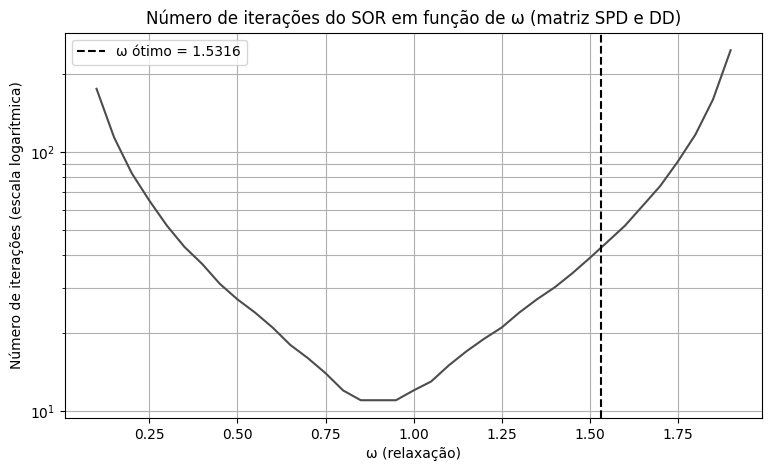

In [56]:
plt.figure(figsize=(9, 5))

plt.semilogy(valores_omega, lista_iter,
             linestyle='-',
             color='#4D4D4D')

plt.axvline(omega_teorico, color='black', linestyle='--',
            label=f'ω ótimo = {omega_teorico:.4f}')

plt.xlabel("ω (relaxação)")
plt.ylabel("Número de iterações (escala logarítmica)")
plt.title("Número de iterações do SOR em função de ω")
plt.grid(True, which="both")
plt.legend()

plt.savefig("sor_omega_log.png", dpi=300, bbox_inches="tight")
plt.show()


## **2. Escalabilidade e desempenho**

**(a)** Gere matrizes simétricas definidas positivas de diferentes tamanhos (ex:
n = 50, 100, 500, 1000). Resolva os sistemas usando Gauss-Seidel e Gradientes Conjugados.

In [66]:
def conjgrad(A, b, x0=None, tol=1e-8, max_iter=None):
    M = np.array(A, dtype=float)
    v = np.array(b, dtype=float)
    n = len(b)
    x = np.zeros(n) if x0 is None else np.array(x0, dtype=float)
    if max_iter is None:
        max_iter = n
    r = b - A @ x
    p = r.copy()
    rsold = r @ r
    inicio = time.time()
    for k in range(max_iter):
        Ap = A @ p
        alpha = rsold / (p @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r @ r
        if np.sqrt(rsnew) / np.linalg.norm(b) < tol:
          break
        beta = rsnew / rsold
        p = r + beta * p
        rsold = rsnew
    fim = time.time()
    tempo_execucao = fim - inicio
    return x, k + 1, tempo_execucao

In [64]:
def seidel_iteracao(A, b, x0=None, tol=1e-6):
    M = np.array(A, dtype=float)
    v = np.array(b, dtype=float)
    n = len(A)
    x = np.zeros(n) if x0 is None else np.array(x0, dtype=float)
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    B = -np.linalg.inv(D + L) @ U
    c = np.linalg.inv(D + L) @ b
    inicio = time.time()
    iteracoes = 0
    while True:
        x_old = x.copy()
        x = B @ x_old + c
        iteracoes += 1
        r = b - A @ x
        if np.linalg.norm(r) / np.linalg.norm(b) < tol:
            break
    fim = time.time()
    tempo = fim - inicio
    return x, iteracoes, tempo

In [62]:
def matriz_SPD(n):
    P = np.random.rand(n, n)
    M = P.T @ P + n * np.eye(n)
    return M

**(b)** Gere gráficos comparando o tempo de execução e o número de iterações
para cada método em função do tamanho da matriz.


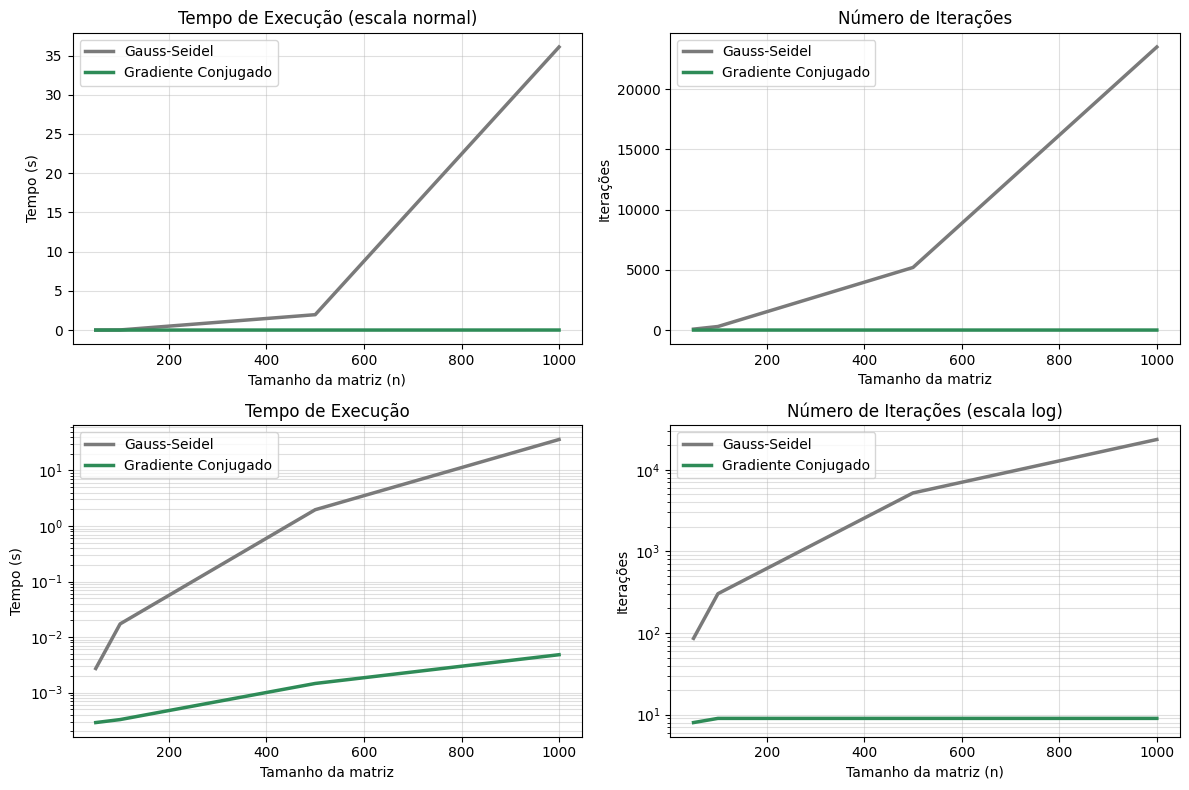

In [73]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))


cor_gs = "#7A7A7A"
cor_cg = "#2E8B57"

axs[0, 0].plot(tamanhos, tempos_seidel,
               color=cor_gs, linewidth=2.5, label='Gauss-Seidel')
axs[0, 0].plot(tamanhos, tempos_cg,
               color=cor_cg, linewidth=2.5, label='Gradiente Conjugado')

axs[0, 0].set_title("Tempo de Execução (escala normal)")
axs[0, 0].set_xlabel("Tamanho da matriz (n)")
axs[0, 0].set_ylabel("Tempo (s)")
axs[0, 0].grid(True, alpha=0.4)
axs[0, 0].legend()

axs[0, 1].plot(tamanhos, iter_seidel,
               color=cor_gs, linewidth=2.5, label='Gauss-Seidel')
axs[0, 1].plot(tamanhos, iter_cg,
               color=cor_cg, linewidth=2.5, label='Gradiente Conjugado')

axs[0, 1].set_title("Número de Iterações")
axs[0, 1].set_xlabel("Tamanho da matriz")
axs[0, 1].set_ylabel("Iterações")
axs[0, 1].grid(True, alpha=0.4)
axs[0, 1].legend()


axs[1, 0].semilogy(tamanhos, tempos_seidel,
                   color=cor_gs, linewidth=2.5, label='Gauss-Seidel')
axs[1, 0].semilogy(tamanhos, tempos_cg,
                   color=cor_cg, linewidth=2.5, label='Gradiente Conjugado')

axs[1, 0].set_title("Tempo de Execução")
axs[1, 0].set_xlabel("Tamanho da matriz")
axs[1, 0].set_ylabel("Tempo (s)")
axs[1, 0].grid(True, which="both", alpha=0.4)
axs[1, 0].legend()


axs[1, 1].semilogy(tamanhos, iter_seidel,
                   color=cor_gs, linewidth=2.5, label='Gauss-Seidel')
axs[1, 1].semilogy(tamanhos, iter_cg,
                   color=cor_cg, linewidth=2.5, label='Gradiente Conjugado')

axs[1, 1].set_title("Número de Iterações (escala log)")
axs[1, 1].set_xlabel("Tamanho da matriz (n)")
axs[1, 1].set_ylabel("Iterações")
axs[1, 1].grid(True, which="both", alpha=0.4)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# *Parte 2* : **Cálculo de autovalores e autovetores. Métodos a implementar:**

• Método da Potência.

• Método da Potência Inversa.



## **1. Testes e análise da convergência:**

**(a)** Crie uma matriz simples (ex: 6x6) cujos autovalores sejam conhecidos.

In [74]:


def construir_matriz_com_espectro(lambdas):
    """
    Gera a matriz M ∈ R^{n×n} com autovalores pré-definidos (lambdas)
    usando: M = Q T Q^T
    """
    n = len(lambdas)
    T = np.zeros((n, n))
    np.fill_diagonal(T, lambdas)
    B = np.random.randn(n, n)
    Q, _ = np.linalg.qr(B)

    M = Q @ T @ Q.T
    return MS

lambdas = [8, 4, 3, -1, -4, -6]

M = construir_matriz_com_espectro(lambdas)

v = np.random.randint(-10, 10, size=len(lambdas)).astype(float)

autovalores, autovetores = np.linalg.eig(M)

print("Matriz")
print(np.round(M, 3))

print("\nVetor")
print(v)

print("\nAutovalores")
print(np.round(autovalores, 6))

print("\nAutovetores")
print(np.round(autovetores, 6))



Matriz
[[ 4.422  2.503 -4.126 -0.385 -0.835  1.43 ]
 [ 2.503 -1.763 -1.522 -1.957  2.809 -2.366]
 [-4.126 -1.522 -1.326  1.286  1.054  1.073]
 [-0.385 -1.957  1.286  1.49   2.156  1.208]
 [-0.835  2.809  1.054  2.156  1.604  0.68 ]
 [ 1.43  -2.366  1.073  1.208  0.68  -0.426]]

Vetor
[-3. -1. -2. -1. -6. -5.]

Autovalores
[ 8. -6. -4.  4.  3. -1.]

Autovetores
[[ 0.772577  0.285938 -0.365574  0.330379  0.280263  0.004666]
 [ 0.299063 -0.734653 -0.230591  0.143254 -0.544822  0.017947]
 [-0.453997  0.081537 -0.847646  0.034805  0.017297  0.259274]
 [-0.285971 -0.240968 -0.040292  0.575043  0.314634 -0.654876]
 [-0.1475    0.395328  0.209131  0.67031  -0.518207  0.245702]
 [-0.063534 -0.396896  0.22208   0.298541  0.506744  0.665733]]


**(b)** Aplique o Método da Potência para encontrar o autovalor dominante e o
seu autovetor associado.

<>:60: SyntaxWarning: invalid escape sequence '\l'
<>:60: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-3668833043.py:60: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_ylabel("Aproximação de $\lambda$")


Autovalor dominante exato: 8
Aproximação do autovalor: 7.9999993849
Erro relativo: 7.689e-08
Iterações: 31

Aproximação do Autovetor:
[ 0.130825  0.051231  0.884176 -0.309899 -0.151804 -0.281799]


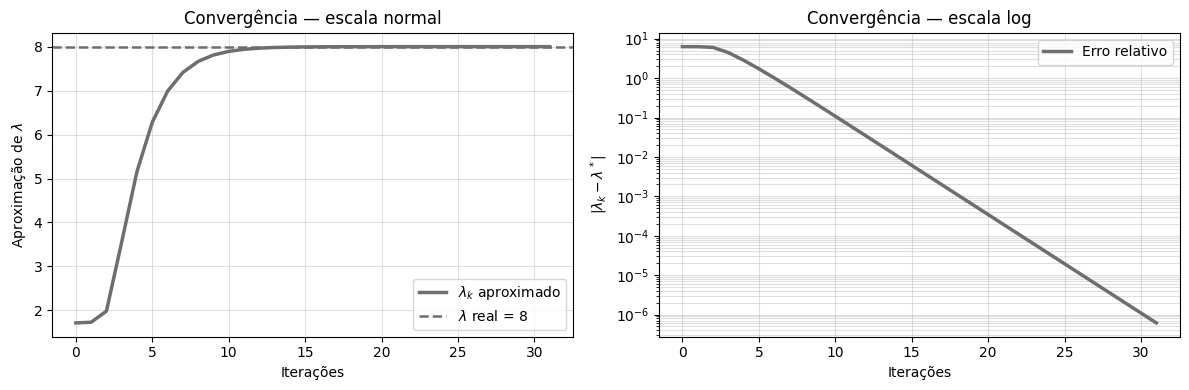

In [78]:
def metodo_potencias(M, q0, tol=1e-7, max_iter=10000):
    q = q0 / np.linalg.norm(q0)
    lambda_k = float(q.T @ M @ q)
    historico = [(0, lambda_k)]

    for k in range(1, max_iter + 1):
        lambda_old = lambda_k
        z = M @ q
        q = z / np.linalg.norm(z)
        lambda_k = float(q.T @ M @ q)
        historico.append((k, lambda_k))

        erro_relativo = abs(lambda_k - lambda_old) / abs(lambda_k) if abs(lambda_k) > 1e-15 else np.inf
        if erro_relativo < tol:
            break

    return q, lambda_k, k, historico

lambdas = [8, 4, 3, -1, -4, -6]

M = construir_matriz_com_espectro(lambdas)

q0 = np.ones(len(lambdas))

autovetor_dom, lambda_dom, it_dom, hist = metodo_potencias(M, q0)

lambda_real = max(lambdas, key=abs)

erro_rel = abs(lambda_dom - lambda_real) / abs(lambda_real)

print("Autovalor dominante exato:", lambda_real)
print(f"Aproximação do autovalor: {lambda_dom:.10f}")
print(f"Erro relativo: {erro_rel:.3e}")
print(f"Iterações: {it_dom}")

print("\nAproximação do Autovetor:")
print(np.round(autovetor_dom, 6))


its = [x[0] for x in hist]
vals = [x[1] for x in hist]

cor = "#6E6E6E"

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(its, vals, color=cor, linewidth=2.5, label=r'$\lambda_k$ aproximado')
axs[0].axhline(y=lambda_real, color=cor, linestyle='--', linewidth=1.8,
               label=rf'$\lambda$ real = {lambda_real}')

axs[0].set_title("Convergência — escala normal")
axs[0].set_xlabel("Iterações")
axs[0].set_ylabel("Aproximação de $\lambda$")
axs[0].grid(True, alpha=0.4)
axs[0].legend()

axs[1].semilogy(its, np.abs(np.array(vals) - lambda_real),
                color=cor, linewidth=2.5, label=r'Erro relativo')

axs[1].set_title("Convergência — escala log")
axs[1].set_xlabel("Iterações")
axs[1].set_ylabel(r"$|\lambda_k - \lambda^*|$")
axs[1].grid(True, which="both", alpha=0.4)
axs[1].legend()

plt.tight_layout()
plt.show()


**(c)** Aplique o Método da Potência Inversa para encontrar o autovalor de menor módulo.

Autovalor de menor módulo exato: -1
Aproximação do Autovalor: -0.9999999984
Erro relativo: 1.563e-09
Iterações: 10

Aproximação do Autovetor:
 [-0.307326  0.225795 -0.093205  0.01129   0.554493  0.733683]


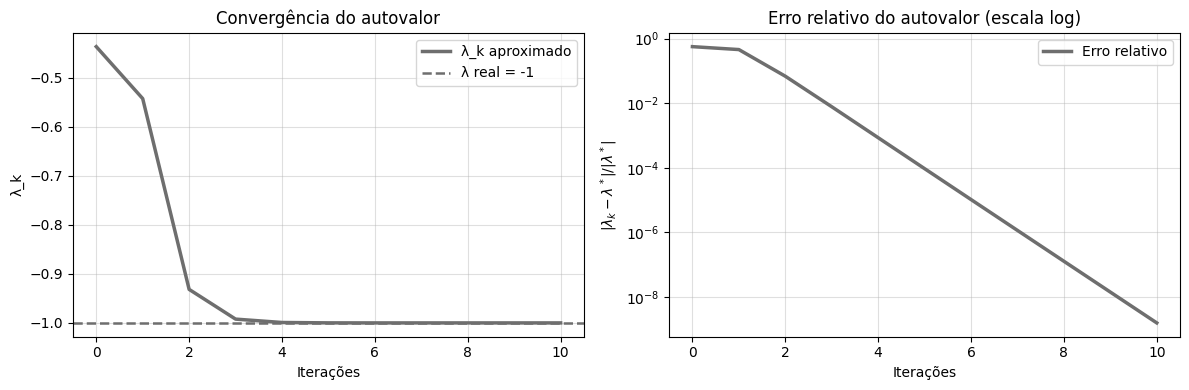

In [83]:
def construir_matriz_com_espectro(lambdas):
    """
    Gera a matriz M ∈ R^{n×n} com autovalores pré-definidos (lambdas)
    usando M = Q T Q^T.
    """
    n = len(lambdas)
    T = np.zeros((n, n))
    np.fill_diagonal(T, lambdas)

    B = np.random.randn(n, n)
    Q, _ = np.linalg.qr(B)

    M = Q @ T @ Q.T
    return M

def metodo_potencias_inversas(M, q0, tol=1e-7, max_iter=10000):
    """
    Aproxima o autovalor de menor módulo e seu autovetor associado
    usando o Método da Potência Inversa.
    """
    q = q0 / np.linalg.norm(q0)
    lambda_k = float(q.T @ M @ q)
    historico = [(0, lambda_k)]

    for k in range(1, max_iter + 1):
        lambda_old = lambda_k

        z = np.linalg.solve(M, q)
        q = z / np.linalg.norm(z)

        lambda_k = float(q.T @ M @ q)
        historico.append((k, lambda_k))

        erro_relativo = abs(lambda_k - lambda_old) / abs(lambda_k) if abs(lambda_k) > 1e-15 else np.inf
        if erro_relativo < tol:
            break

    return q, lambda_k, k, historico


lambdas = [8, 4, 3, -1, -4, -6]
M = construir_matriz_com_espectro(lambdas)

q0 = np.ones(len(lambdas))

autovetor_min, lambda_min, it_min, hist_min = metodo_potencias_inversas(M, q0)

lambda_real_min = min(lambdas, key=abs)
erro_rel_min = abs(lambda_min - lambda_real_min) / abs(lambda_real_min)

print("Autovalor de menor módulo exato:", lambda_real_min)
print(f"Aproximação do Autovalor: {lambda_min:.10f}")
print(f"Erro relativo: {erro_rel_min:.3e}")
print(f"Iterações: {it_min}")
print("\nAproximação do Autovetor:\n", np.round(autovetor_min, 6))


its = [x[0] for x in hist_min]
lambdas_k = [x[1] for x in hist_min]
erros_rel = [abs(l - lambda_real_min) / abs(lambda_real_min) for l in lambdas_k]

cor = "#6E6E6E"

fig, axs = plt.subplots(1, 2, figsize=(12, 4))


axs[0].plot(its, lambdas_k,
            color=cor, linewidth=2.5, label='λ_k aproximado')

axs[0].axhline(y=lambda_real_min,
               color=cor, linestyle='--', linewidth=1.8,
               label=f'λ real = {lambda_real_min}')

axs[0].set_title("Convergência do autovalor")
axs[0].set_xlabel("Iterações")
axs[0].set_ylabel("λ_k")
axs[0].grid(True, alpha=0.4)
axs[0].legend()

axs[1].semilogy(its, erros_rel,
                color=cor, linewidth=2.5, label='Erro relativo')

axs[1].set_title("Erro relativo do autovalor (escala log)")
axs[1].set_xlabel("Iterações")
axs[1].set_ylabel(r"$|\lambda_k - \lambda^*|/|\lambda^*|$")
axs[1].grid(True, which="both", alpha=0.4)
axs[1].legend()

plt.tight_layout()
plt.show()


## **2. Aplicação prática, análise de uma Cadeia de Markov:**

**(a)** Modelar um sistema simples, como uma transição entre 3 estados (ex:
"Ensolarado", "Nublado", "Chuvoso") com uma matriz de transição de
probabilidade. Cada estado deve chegar a cada estado (cadeia de Markov
irredutível).


In [15]:
L = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.2, 0.3, 0.5]
])

print("Matriz de transição L:")
print(L)

Matriz de transição L:
[[0.7 0.2 0.1]
 [0.3 0.4 0.3]
 [0.2 0.3 0.5]]



Distribuição estacionária:
[0.298969 0.391753 0.309278]
Iteraçõesa: 11


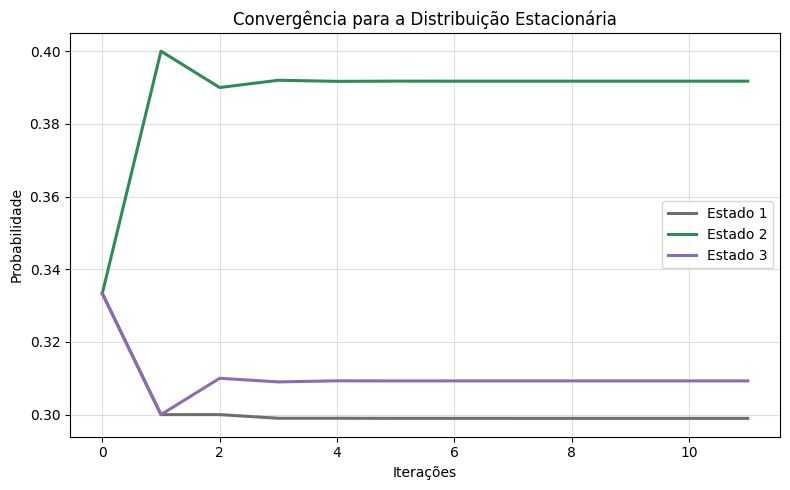

In [86]:


def metodo_potencias_markov(P, q0=None, tol=1e-8, max_iter=1000):
    n = P.shape[0]
    if q0 is None:
        q0 = np.ones(n) / n
    q = q0 / np.linalg.norm(q0, 1)
    historico = [q.copy()]
    for k in range(max_iter):

        q_new = P.T @ q

        q_new /= np.sum(q_new)

        historico.append(q_new.copy())

        if np.linalg.norm(q_new - q, 1) < tol:
            break

        q = q_new

    return q, k + 1, historico

q0 = np.array([1/3, 1/3, 1/3])
q_estacionaria, iters, hist = metodo_potencias_markov(P, q0)

print("\nDistribuição estacionária:")
print(np.round(q_estacionaria, 6))
print(f"Iteraçõesa: {iters}")


hist_array = np.array(hist)

plt.figure(figsize=(8, 5))


cor1 = "#6E6E6E"
cor2 = "#2E8B57"
cor3 = "#8C6BB1"

plt.plot(hist_array[:, 0], color=cor1, linewidth=2.2, label='Estado 1')
plt.plot(hist_array[:, 1], color=cor2, linewidth=2.2, label='Estado 2')
plt.plot(hist_array[:, 2], color=cor3, linewidth=2.2, label='Estado 3')

plt.xlabel("Iterações")
plt.ylabel("Probabilidade")
plt.title("Convergência para a Distribuição Estacionária")
plt.grid(True, alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


**(b)** Usar o Método da Potência para encontrar o autovetor a esquerda dominante (que corresponderá à distribuição estacionária) e interpretar o resultado

In [55]:
L = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.2, 0.3, 0.5]
])

print("Matriz de transição L:")
print(L)


def metodo_potencias_esquerda(L, q0=None, tol=1e-8, max_iter=1000):
    """
    Método da potência aplicado ao autovetor à esquerda (via L^T).
    Retorna a distribuição estacionária e o histórico de convergência.
    """
    n = L.shape[0]
    if q0 is None:
        q0 = np.ones(n) / n

    q = q0 / np.sum(q0)
    historico = [q.copy()]

    for k in range(max_iter):
        q_novo = L.T @ q

        q_novo /= np.sum(q_novo)
        historico.append(q_novo.copy())

        if np.linalg.norm(q_novo - q, 1) < tol:
            break

        q = q_novo

    return q, k + 1, np.array(historico)

q0 = np.array([1/3, 1/3, 1/3])

pi_esquerda, iters, hist_esquerda = metodo_potencias_esquerda(L, q0)

print("Autovetor à esquerda dominante:")
print(np.round(pi_esquerda, 6))
print(f"Iterações: {iters}")


Matriz de transição L:
[[0.7 0.2 0.1]
 [0.3 0.4 0.3]
 [0.2 0.3 0.5]]
Autovetor à esquerda dominante:
[0.456522 0.282609 0.26087 ]
Iterações: 23
